# Imports

In [120]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [122]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

# Reading the data into df

In [65]:
#Reading the excel into data frame
df = pd.read_excel('C:\InputData.xlsx')
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [123]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

In [124]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


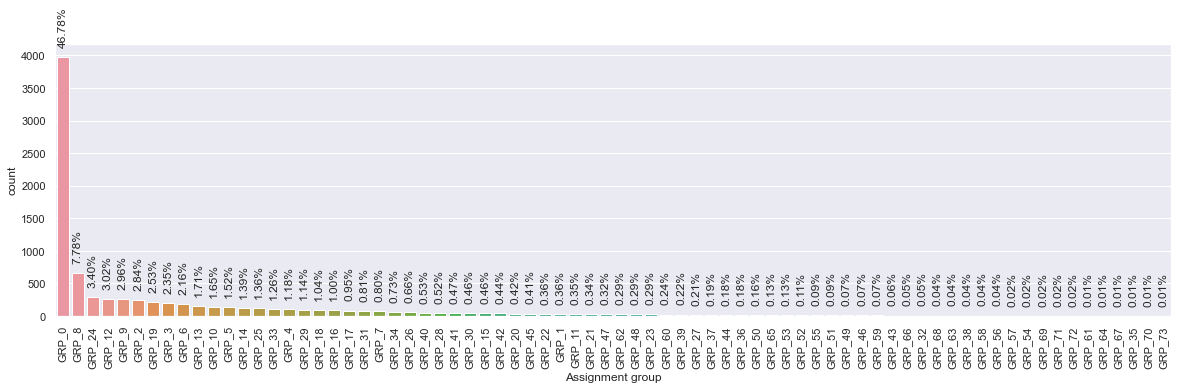

In [125]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [126]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [127]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [128]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


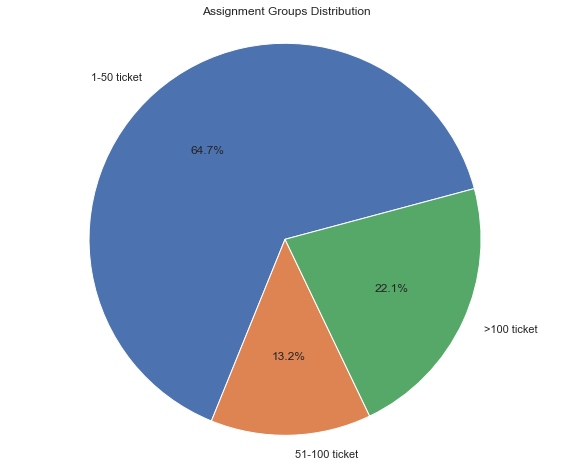

In [129]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [130]:
#checking the null values
df.isnull().sum()

Short description      8
Description            0
Caller                 0
Assignment group       0
language               0
English_Description    0
dtype: int64

In [131]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group,language,English_Description


In [132]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [133]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description      i am locked out of skype
Description            i am locked out of skype
Caller                        viyglzfo ajtfzpkb
Assignment group                          GRP_0
language                                     en
English_Description    i am locked out of skype
Name: 4395, dtype: object

In [134]:
#Checking for the null values
df.isnull().sum()

Short description      8
Description            0
Caller                 0
Assignment group       0
language               0
English_Description    0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [135]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [136]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
5124,the well-established work orders has been repo...,GRP_25,32
4143,so# 35035632 is set up to ship 2nd day air whi...,GRP_18,63
7857,"hi team, i need your help to reinstall antivir...",GRP_50,27
7089,skype does not open.,GRP_0,4
6741,monitor orientation error,GRP_0,3
5590,erp SID_34 account locked,GRP_0,4
5195,windows password reset,GRP_0,3
1522,ticket update for-inplant_866222,GRP_0,3
8300,i connected through vpn to look up information...,GRP_0,28
275,_x000D_\n_x000D_\nreceived from: tfnzwycd.bico...,GRP_0,30


In [137]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1657


In [138]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,GRP_30,1
415,complete,GRP_17,1
416,completed,GRP_0,1
608,funktionsstÃ¶rung,GRP_33,1
618,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,GRP_0,1
...,...,...,...
8059,the,GRP_17,1
8092,the,GRP_17,1
8093,the,GRP_17,1
8168,the,GRP_17,1


In [139]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [140]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
6438,unable to attach a document in erp,GRP_0,7,28
8182,i have not used this in quite awhile and it wi...,GRP_0,19,70
7586,windows ç³»ç»Ÿæ— æ³•ç™»å½•æç¤ºè®¡ç®—æœºä¸Žä¸...,GRP_31,3,72
6820,received from: monitoring_tool@company.com_x00...,GRP_8,12,106
1523,when try and initialize secure logon get messa...,GRP_0,22,116


In [141]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [142]:
#Checking the maximum character count
feature_df['char_counts'].max()

12785

In [143]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
8217,\n\nreceived from: wchidyuk.shqbfpuy@gmail.com...,GRP_0,65,764,0.085079
3451,\n\nreceived from: jczwxvdn.pexuklry@gmail.com...,GRP_19,27,182,0.148352
6344,\n\nreceived from: rkyjnbqh.kfshormi@gmail.com...,GRP_0,43,421,0.102138
8161,unable to login to outlook and skype,GRP_0,7,30,0.233333
7048,businessobjects_cms: cms server watcher: serve...,GRP_14,7,60,0.116667


In [144]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.009900990099009901
Maximum avg word count 1.0


In [145]:
print(stop_words)
len(stop_words)

{'side', '’m', 'made', 'therefore', 'whereby', 'during', 'or', 'beside', 'fifty', 'towards', 'same', 'both', 'anywhere', 'have', 'other', 'by', 'former', 'please', 'sixty', 'ourselves', 'never', 'show', 'whither', 'somewhere', 'behind', 'say', 'meanwhile', 'could', 'herein', 'really', 'last', 'so', 'against', 'various', 'already', 'rather', 'who', 'part', 'around', '‘s', 'to', 'each', 'such', 'latterly', 'further', 'me', 'do', 'next', 'becoming', 'few', 'whatever', 'again', 'toward', 'hereby', 'among', 'eight', 'between', 're', 'with', 'amount', 'done', 'am', 'noone', 'more', 'without', 'i', 'thereupon', 'make', 'it', 'us', 'thereby', 'move', 'was', 'everything', 'seem', 'seems', 'on', 'thereafter', '‘re', 'two', 'anyhow', 'wherein', 'less', 'mostly', 'for', 'if', 'go', 'within', 'n’t', "'d", '’ll', 'also', 'hereafter', 'nine', 'see', '‘ve', 'my', 'keep', 'afterwards', 'moreover', "'ll", 'did', 'empty', 'nor', "'s", 'you', "'m", 'nobody', 'name', 'whereafter', 'then', 'over', 'neverthe

326

In [146]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
1188,ticket update on ticket_no0448767,GRP_0,4,30,0.133333,1
8268,windows account locked,GRP_0,3,20,0.150000,0
4786,"hi liuytre,_x000D_\n_x000D_\nsorry to hear of ...",GRP_0,81,396,0.204545,45
530,unable to connect to company center // sales o...,GRP_0,11,50,0.220000,3
2018,i needed a hand setting up jabra pro headset f...,GRP_0,28,114,0.245614,12


In [147]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 352


In [148]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
2016,sqlcuhep railgnfb called in for an issue where...,GRP_0,22,105,0.209524,11,0
6767,\n\nreceived from: nrbgctwm.kfwdhrmt@gmail.com...,GRP_12,69,547,0.126143,12,1
7095,mitarbeiter reichenberg philipp benÃ¶tigt bere...,GRP_34,9,83,0.108434,0,0
1381,_x000D_\n_x000D_\nreceived from: rlphwiqn.zagv...,GRP_3,51,252,0.202381,24,0
5153,\n\nreceived from: vnetbgio.lqxztben@gmail.com...,GRP_0,47,310,0.151613,18,0


In [149]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 444
Minimum number of digits present 0


In [150]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
3607,_x000D_\n_x000D_\nreceived from: vxzahrlc.frtk...,GRP_0,17,130,0.130769,5,0,0
1997,received from: monitoring_tool@company.com_x00...,GRP_9,12,107,0.112150,1,0,0
3503,upgraded the ie to 11 on uacyltoe hxgaycze wor...,GRP_19,9,47,0.191489,3,1,0
3001,_x000D_\n_x000D_\nreceived from: qgrbdnoc.dgup...,GRP_6,90,533,0.168856,43,2,0
1290,battery not charging when the power adapoter i...,GRP_19,54,300,0.180000,17,1,0


In [151]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing



1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets, hence the caller column does not hold any value for the classification. There might be certain correlation However it will add bias. Hence removing the column also



In [152]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [153]:
df['language'].value_counts()

en    7025
de     406
af     261
it     136
fr     122
sv      87
no      70
da      62
ca      60
nl      60
es      48
pl      29
pt      29
ro      20
so      12
sl      12
cy      11
sq      11
tl       8
et       7
hr       5
tr       4
id       4
fi       4
lt       3
sk       2
cs       1
lv       1
Name: language, dtype: int64

In [154]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [155]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [156]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language,English_Description
8311,abended job in job_scheduler: Job_2078,received from: monitoring_tool@company.com_x00...,ZkBogxib QsEJzdZO,GRP_6,en,received from: monitoring_tool@company.com_x00...
3566,pc empw 8144239 neu aufsetzen,pc empw 8144239 neu aufsetzen,wyotidgu nydzrtuw,GRP_33,de,pc empw 8144239 neu aufsetzen
2302,setup we_wu73 \jionmpsf wnkpzcmv,setup we_wu73 \jionmpsf wnkpzcmv,jionmpsf wnkpzcmv,GRP_24,pl,setup we_wu73 \jionmpsf wnkpzcmv
7412,HostName_1045:(reporting_engineering_tooling -...,reporting_tool alert: average (4 samples) disk...,mnlazfsr mtqrkhnx,GRP_9,en,reporting_tool alert: average (4 samples) disk...
6270,unable to log in to erp SID_34,unable to log in to erp SID_34,jfgepoay qsbjaemc,GRP_0,it,unable to log in to erp SID_34


In [157]:
df_translated_text=df.drop(['Description','language'],axis=1)

In [158]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [159]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description
2110,ticket update on inplant_867380,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_867380
1981,telephone repair pu-4 (shop floor 173 connect...,segvwfyn mogtrevn,GRP_19,received from segvwfynmogtrevngmailcomdear sir...
6872,weekly reboot of csqe prod servers,uvrbhlnt bjrmalzi,GRP_8,weekly reboot of csqe prod servers _x000D__x00...
7713,setup new ws\svuxjkpg tpurnjvi,svuxjkpg tpurnjvi,GRP_24,setup new wssvuxjkpg tpurnjvi
3113,account locked in supply_chain_software,rvdtagmf klbnhydo,GRP_0,account locked in supply_chain_software


In [160]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [161]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions
2115,engineering tool page not opening,lwgytuxq qspdztiw,GRP_0,engineering tool page not opening,engineering tool page not opening
291,india: 29060s-access-sw01 and sw02 went down ...,mnlazfsr mtqrkhnx,GRP_8,india 29060saccesssw01 and sw02 went down at ...,india 29060saccesssw01 and sw02 went down at 0...
6943,blue screen error.,njcxmlbf svlmrqjd,GRP_0,blue screen error,blue screen error
8300,erp SID_34 is not available,naecuhxz hdrqvume,GRP_0,i connected through vpn to look up information...,i connected through vpn to look up information...
3554,to add a new employee to distribution lists,bmudkpie qolrvbip,GRP_0,received from bmudkpieqolrvbipgmailcomhello1 ...,received from bmudkpieqolrvbipgmailcomhello1 p...


In [162]:
  
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)


,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
203,need the username to submit the insurance,kamtroxv oequfsky,GRP_0,need the username to submit the insurance,need the username to submit the insurance,need username submit insurance
4006,unable to loginto skype,hlcujyed hqfolasz,GRP_0,unable to loginto skype,unable to loginto skype,unable loginto skype
7402,after upgrade telephony_software has dierppear...,zkgfcyvx sgxeatyb,GRP_0,after upgrade telephony_software has dierppear...,after upgrade telephony_software has dierppear...,upgrade telephony_software dierppeared screen
2170,wifi not working in conference room of usa oh ...,aexbclqv zvapcslb,GRP_0,wifi not working in conference room of usa oh ...,wifi not working in conference room of usa oh ...,wifi working conference room usa oh _x000D_
6925,company email accounts tzrekwqf homwadbs!,tzrekwqf homwadbs,GRP_0,dear support team_x000D__x000D_can you give me...,dear support team_x000D__x000D_can you give me...,dear support team_x000D__x000D_can status issu...


In [163]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
376,business_client not working,lvxakohq tsfnhowj,GRP_0,_x000D__x000D_received from lvxakohqtsfnhowjgm...,_x000D__x000D_received from lvxakohqtsfnhowjgm...,_x000D__x000D_received lvxakohqtsfnhowjgmailco...
6045,vpn router : company-eu-deu-germany-dmvpn-1811...,bjtguqne xthqrzpc,GRP_8,vpn router companyeudeugermanydmvpn1811rtr02 ...,vpn router companyeudeugermanydmvpn1811rtr02 d...,vpn router companyeudeugermanydmvpn1811rtr02 d...
7881,company center page does not load,fpbmtxei jtqbcnfs,GRP_0,company center page does not load,company center page does not load,company center page load
1903,vpn not getting log in,xiwegtas ygrfbzon,GRP_0,namevithrkas languagebrowsermicrosoft internet...,namevithrkas languagebrowsermicrosoft internet...,namevithrkas languagebrowsermicrosoft internet...
5172,password re-set,zenjimbo xirzfpob,GRP_0,_x000D__x000D_received from zenjimdghtyboxirzf...,_x000D__x000D_received from zenjimdghtyboxirzf...,_x000D__x000D_received zenjimdghtyboxirzfpobgm...


In [164]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [165]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(15)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
3532,security incidents - ( #in33944327) :possible ...,gzhapcld fdigznbk,GRP_2,source ip _x000D_system name _x000D_user name...,source ip _x000D_system name _x000D_user name_...,source ip _x000D_system _x000D_user name_x000D...
6982,vpn is not connecting.,pfmcnahv ofzlusri,GRP_0,vpn is not connecting,vpn is not connecting,vpn connecting
3914,vpn not working- vpn.company.com link is givi...,jborwynt gidxbfrq,GRP_0,vpn not working vpncompanycom link is giving ...,vpn not working vpncompanycom link is giving e...,vpn working vpncompanycom link giving error
3606,acct 70939408,nkthumgf mwgdenbs,GRP_15,received from nkthumgfmwgdenbsgmailcomthis acc...,received from nkthumgfmwgdenbsgmailcomthis acc...,received nkthumgfmwgdenbsgmailcomthis account ...
2218,the oracle listener monitor is reporting a : w...,jloygrwh acvztedi,GRP_1,the oracle listener monitor is reporting a wa...,the oracle listener monitor is reporting a war...,oracle listener monitor reporting warning stat...
5690,unable to connect to vpn,srmuqpna wtlvbxmc,GRP_0,unable to connect to vpn,unable to connect to vpn,unable connect vpn
3416,password reset ad,ojgxundh aegxpmvd,GRP_0,password reset ad,password reset ad,password reset ad
1008,my collaboration_platform and sync keeps promp...,geylvotd msadrzkj,GRP_0,i changed my password yesterday ever since i k...,i changed my password yesterday ever since i k...,changed password yesterday getting messages en...
7751,erp down,damuphws arkulcoi,GRP_0,user id vaugtyghtlissue erp downlocation us...,user id vaugtyghtlissue erp downlocation usano...,user id vaugtyghtlissue erp downlocation usano...
4580,install company barcode fÃ¼r ewew8323504 \vzqo...,vzqomdgt jwoqbuml,GRP_24,install company barcode fÃr ewew8323504 vzqomd...,install company barcode fAr ewew8323504 vzqomd...,install company barcode fÃr ewew8323504 vzqomd...


In [167]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [168]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))

In [169]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [170]:
df_translated_text.head()

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords,cleaned_description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user detailsemployee manager name_x0...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,16
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,13
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,4
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,unable access hr_tool page,unable access hr_tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error,2


In [180]:
df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

In [181]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1292
Minimum no of words 0


In [182]:
df_text=df_text[df_text['number_of_words']>0]


In [183]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [184]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [185]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [186]:
df_text=df_text.replace(list_1,'Others')

In [187]:
len(df_text['Assignment group'].value_counts().unique())

21

In [188]:
df_text.sample(10)

,Assignment group,cleaned_description,number_of_words
2379,GRP_0,reset password SID_34 erp production SID_37 bw...,8
2460,Others,issues crm dynamics need permissions opening r...,19
3437,Others,_x000D__x000D_received rgtarterjgypacompanycom...,22
426,GRP_0,password change request,3
8417,GRP_24,bluetooth keybankrd defekt dardabthyr,4
6334,GRP_0,unable connect hub,3
1685,GRP_0,error login SID_34 system_x000D_verified user ...,20
1393,GRP_0,click download pdf popup allows download pdf a...,26
3215,GRP_0,windows erp account locked,4
6417,GRP_0,request reset microsoft online services passwo...,7
